In [1]:
import sys
from pathlib import Path
import ProbabilisticParcellation.functional_profiles as fp
import ProbabilisticParcellation.hierarchical_clustering as cl
import ProbabilisticParcellation.similarity_colormap as cm
import Functional_Fusion.dataset as ds
import matplotlib.pyplot as plt
import ProbabilisticParcellation.functional_profiles as fp
import pandas as pd
import seaborn as sb
import ProbabilisticParcellation.scripts.atlas_paper.feature_model as fm
from ProbabilisticParcellation.scripts.atlas_paper.ridge_reg import ridgeFit
import numpy as np



# Import Dash dependencies
base_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'
if not Path(base_dir).exists():
    base_dir = '/srv/diedrichsen/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'
if not Path(base_dir).exists():
    base_dir = '/Users/callithrix/Documents/Projects/Functional_Fusion/'
if not Path(base_dir).exists():
    raise (NameError('Could not find base_dir'))
    

## Explore task differences

In [2]:
Data, regions = fm.load_profiles()
tags = fm.load_Features()
tags_individ = fm.subject_Features(tags, Data)
task_matrix, task_codes = fm.task_indicator(Data)
tags_task = np.concatenate(
    (tags_individ.T.to_numpy(), task_matrix), axis=1)

Data_norm, tags_norm = fm.normalize(Data[regions], tags_task)

# Ridge regression
R2, Features = ridgeFit(Data_norm.to_numpy(), tags_norm,
                        fit_intercept=False, voxel_wise=False, alpha=1.0)


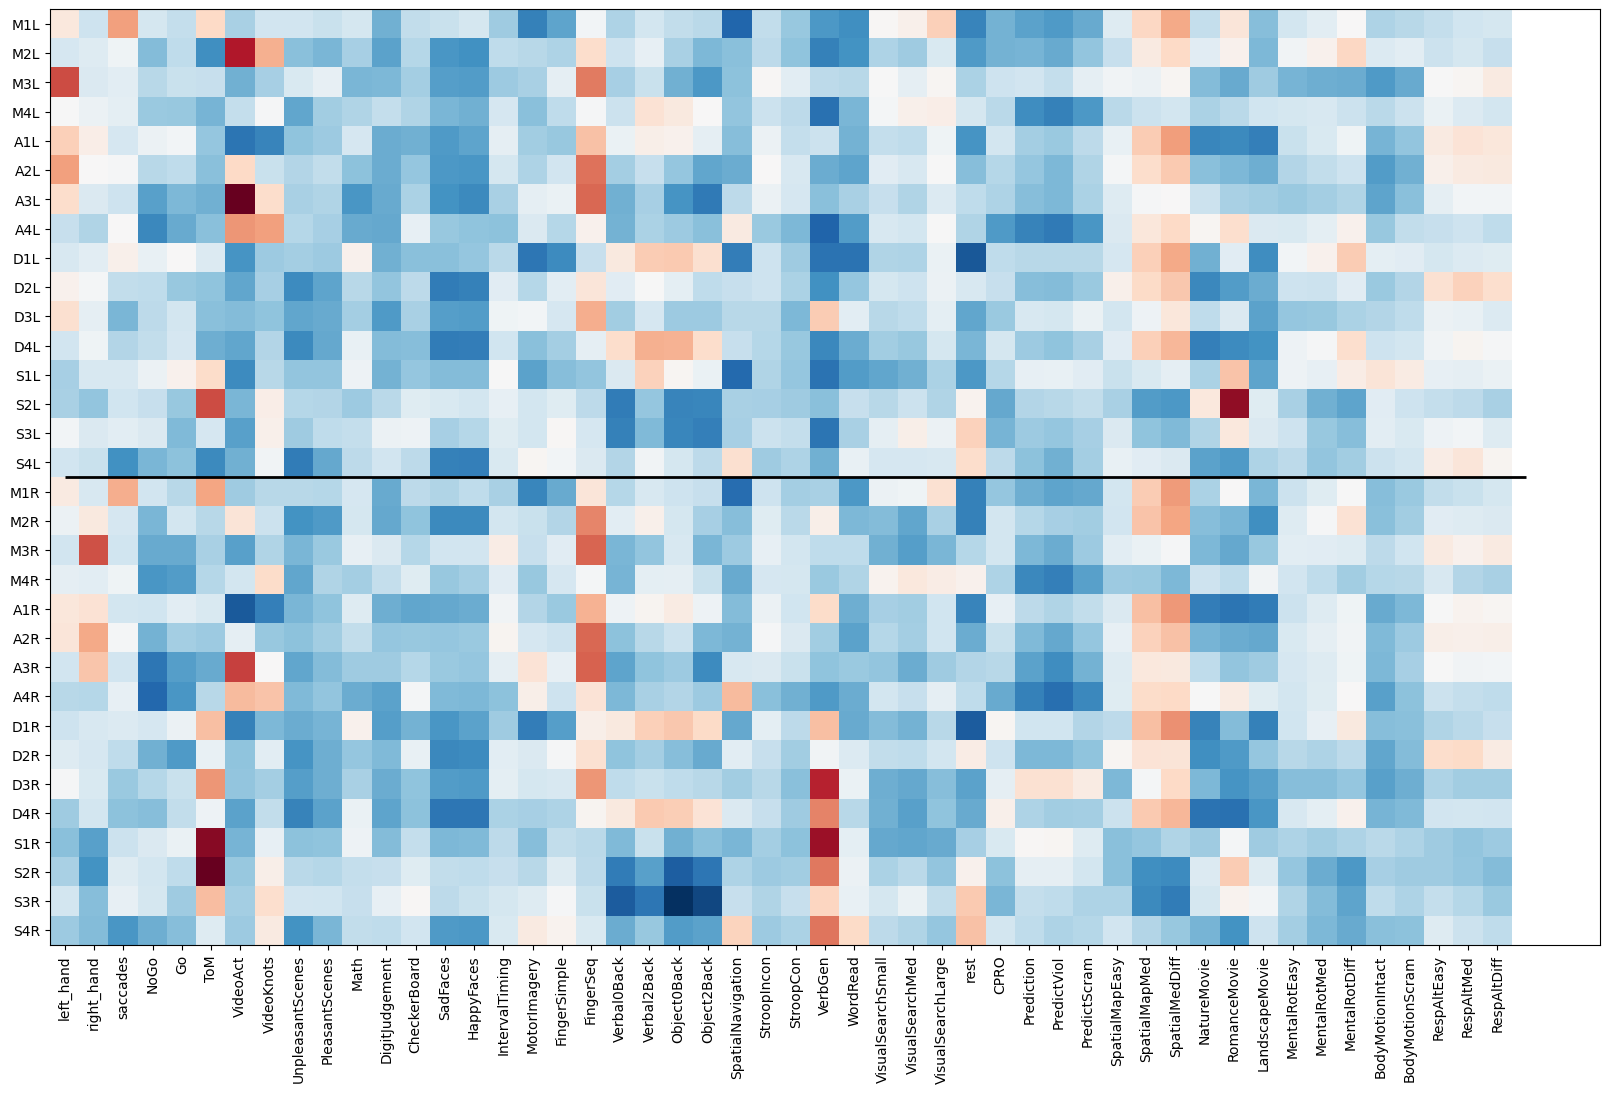

In [3]:
# Make dataframe
Features = pd.DataFrame(Features.T, columns=[
    'left_hand', 'right_hand', 'saccades'] + list(task_codes.keys()), index=regions)

# Plot
cmap = plt.get_cmap('RdBu_r')
plt.figure(figsize=(20, 20))
plt.imshow(Features, cmap=cmap)
plt.yticks(np.arange(len(regions)), regions)
plt.xticks(np.arange(len(Features.columns.tolist())),
           Features.columns.tolist(), rotation=90)

# Plot a horizontal line in the middle
plt.hlines(len(regions) / 2 - 0.5, 0,
           len(Features.columns.tolist()), color='black', linewidth=2)


In [5]:
# Melt
T = Features.reset_index().melt(id_vars='index', value_vars=Features.columns.tolist(),
                         var_name='task', value_name='score')

# make index into column
T['region'] = T['index']
# # Split region into side and region
T['side'] = T.region.str[-1]
T['reg'] = T.region.str[0:2]


In [7]:
T

,index,task,score,region,side,reg
0,M1L,left_hand,0.130131,M1L,L,M1
1,M2L,left_hand,0.029620,M2L,L,M2
2,M3L,left_hand,0.330631,M3L,L,M3
3,M4L,left_hand,0.090430,M4L,L,M4
4,A1L,left_hand,0.179132,A1L,L,A1
...,...,...,...,...,...,...
1595,D4R,RespAltDiff,0.020860,D4R,R,D4
1596,S1R,RespAltDiff,-0.040205,S1R,R,S1
1597,S2R,RespAltDiff,-0.068355,S2R,R,S2
1598,S3R,RespAltDiff,-0.045576,S3R,R,S3


In [25]:
def scatter_plot_tasks(compare, data, ignore_side=False):
    plt.figure()
    if ignore_side:
        # average across sides
        data = data.groupby(['reg', 'task']).mean().reset_index()
        data['index'] = data['reg'].str[0:2]

    task1 = data[data['task'] == compare[0]]
    task2 = data[data['task'] == compare[1]]
    # Average within each task
    task1 = task1.groupby(['index']).mean().reset_index()
    task2 = task2.groupby(['index']).mean().reset_index()
    plt.scatter(task1['score'], task2['score'])

    # Add labels to the dots
    for i in range(len(task1)):
        plt.annotate(f'{task1.iloc[i]["index"]}',
                     (task1.iloc[i]['score'], task2.iloc[i]['score']))

    # Label
    plt.xlabel(compare[0])
    plt.ylabel(compare[1])
    # Insert lines
    plt.axhline(0, color='k', linestyle='--')
    plt.axvline(0, color='k', linestyle='--')
    plt.title(f'{compare[0]} vs {compare[1]}')
    


/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_34341/70157208.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_34341/70157208.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task2 = task2.groupby(['index']).mean().reset_index()


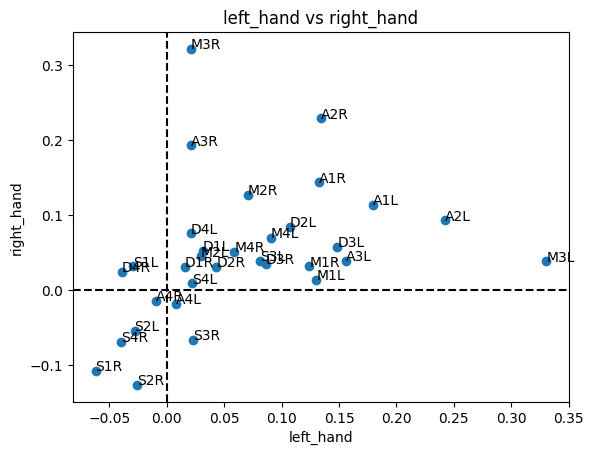

In [26]:
compare = ['left_hand', 'right_hand']
scatter_plot_tasks(compare, T)

In [20]:
T.task.unique()

array(['left_hand', 'right_hand', 'saccades', 'NoGo', 'Go', 'ToM',
       'VideoAct', 'VideoKnots', 'UnpleasantScenes', 'PleasantScenes',
       'Math', 'DigitJudgement', 'CheckerBoard', 'SadFaces', 'HappyFaces',
       'IntervalTiming', 'MotorImagery', 'FingerSimple', 'FingerSeq',
       'Verbal0Back', 'Verbal2Back', 'Object0Back', 'Object2Back',
       'SpatialNavigation', 'StroopIncon', 'StroopCon', 'VerbGen',
       'WordRead', 'VisualSearchSmall', 'VisualSearchMed',
       'VisualSearchLarge', 'rest', 'CPRO', 'Prediction', 'PredictViol',
       'PredictScram', 'SpatialMapEasy', 'SpatialMapMed',
       'SpatialMedDiff', 'NatureMovie', 'RomanceMovie', 'LandscapeMovie',
       'MentalRotEasy', 'MentalRotMed', 'MentalRotDiff',
       'BodyMotionIntact', 'BodyMotionScram', 'RespAltEasy', 'RespAltMed',
       'RespAltDiff'], dtype=object)

/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_34341/70157208.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_34341/70157208.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task2 = task2.groupby(['index']).mean().reset_index()


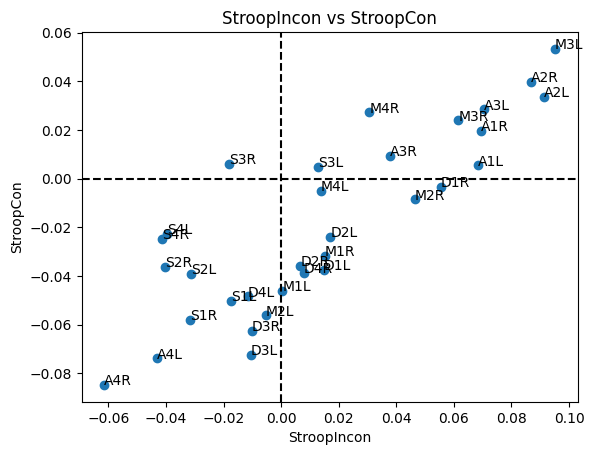

In [30]:
compare = ['StroopIncon', 'StroopCon']
scatter_plot_tasks(compare, T, ignore_side=False)


/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_34341/70157208.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_34341/70157208.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task2 = task2.groupby(['index']).mean().reset_index()


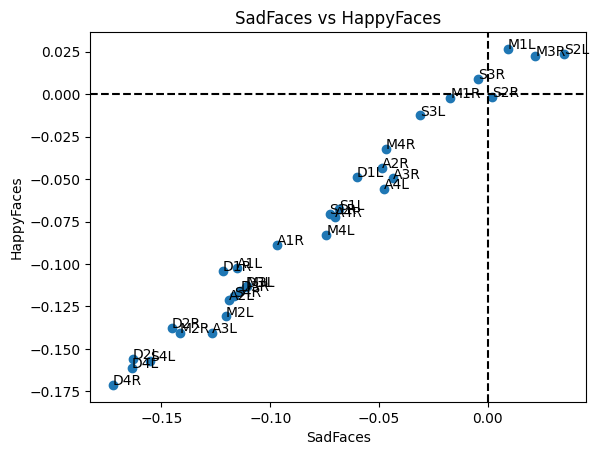

In [31]:
compare = ['SadFaces', 'HappyFaces']
scatter_plot_tasks(compare, T, ignore_side=False)


/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_34341/70157208.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_34341/70157208.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task2 = task2.groupby(['index']).mean().reset_index()


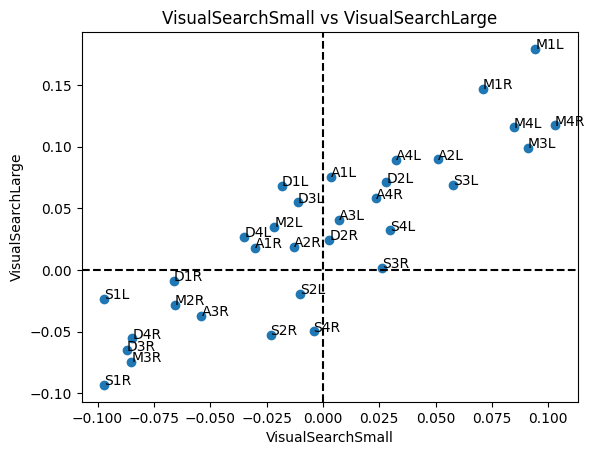

In [32]:
compare = ['VisualSearchSmall', 'VisualSearchLarge']
scatter_plot_tasks(compare, T, ignore_side=False)


/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_34341/70157208.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_34341/70157208.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task2 = task2.groupby(['index']).mean().reset_index()


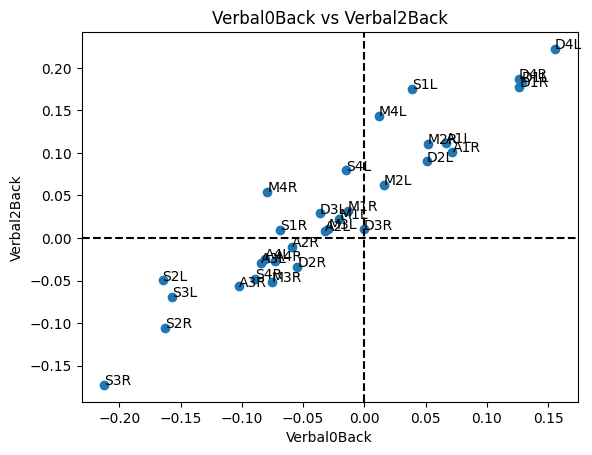

In [33]:
compare = ['Verbal0Back', 'Verbal2Back']
scatter_plot_tasks(compare, T, ignore_side=False)


/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_34341/70157208.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_34341/70157208.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task2 = task2.groupby(['index']).mean().reset_index()


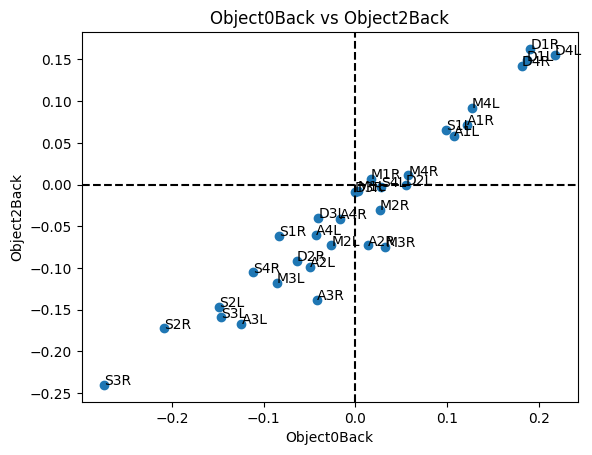

In [34]:
compare = ['Object0Back', 'Object2Back']
scatter_plot_tasks(compare, T, ignore_side=False)


/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_34341/70157208.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_34341/70157208.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task2 = task2.groupby(['index']).mean().reset_index()


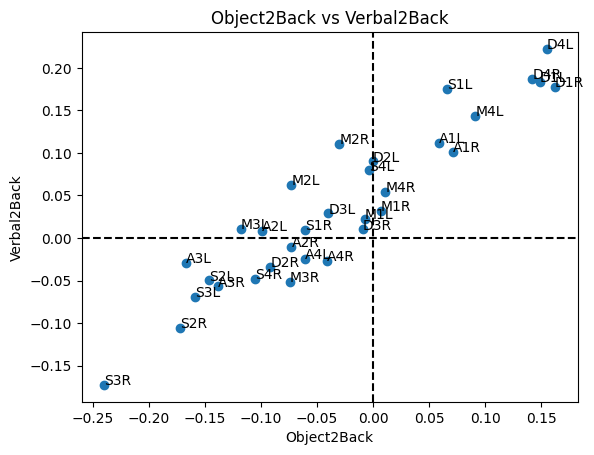

In [40]:
compare = ['Object2Back', 'Verbal2Back']
scatter_plot_tasks(compare, T, ignore_side=False)


/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_34341/70157208.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(['reg', 'task']).mean().reset_index()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_34341/70157208.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_34341/70157208.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric

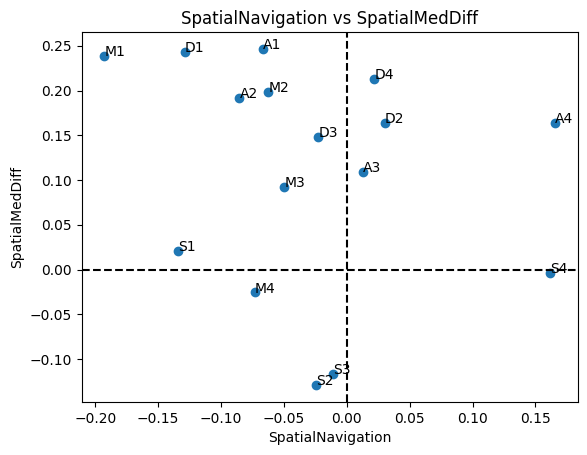

In [44]:
compare = ['SpatialNavigation', 'SpatialMedDiff']
scatter_plot_tasks(compare, T, ignore_side=True)


/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_34341/70157208.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_34341/70157208.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task2 = task2.groupby(['index']).mean().reset_index()


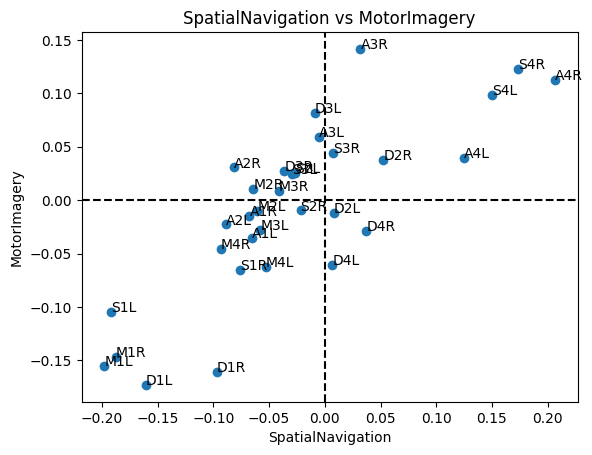

In [46]:
compare = ['SpatialNavigation', 'MotorImagery']
scatter_plot_tasks(compare, T, ignore_side=False)


/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_34341/70157208.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_34341/70157208.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task2 = task2.groupby(['index']).mean().reset_index()


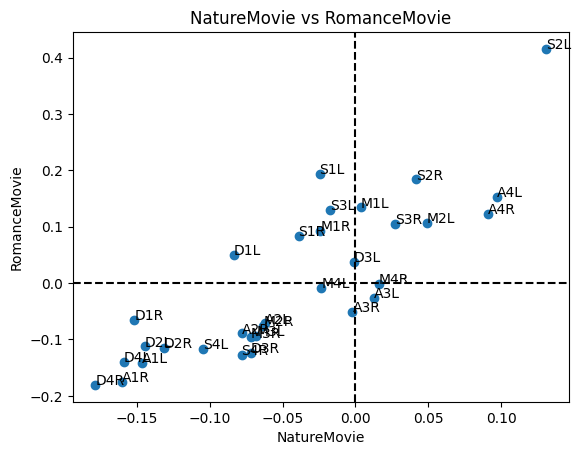

In [47]:
compare = ['NatureMovie', 'RomanceMovie']

scatter_plot_tasks(compare, T, ignore_side=False)


/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_34341/70157208.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_34341/70157208.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task2 = task2.groupby(['index']).mean().reset_index()


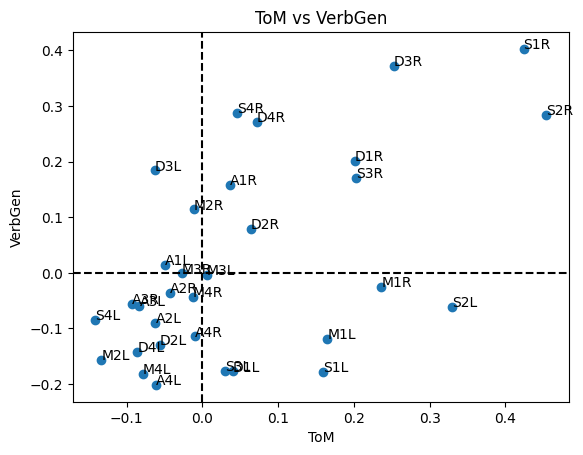

In [48]:
compare = ['ToM', 'VerbGen']
scatter_plot_tasks(compare, T, ignore_side=False)


/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_34341/70157208.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(['reg', 'task']).mean().reset_index()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_34341/70157208.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_34341/70157208.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric

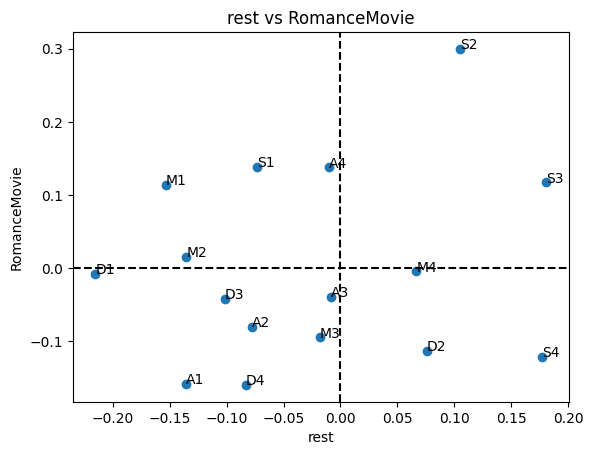

In [50]:
compare = ['rest', 'RomanceMovie']

scatter_plot_tasks(compare, T, ignore_side=True)
